<b><font size=2>CS395f20-b.us - CS397f20-a.us - Introduction to Data Analyisis</b>
<br><br>
<b>Assignment 4</b>
<br><br>
<b>Your name: Junki Kim</b>
<br><br>
<b>Submit file: Assignment4_Junki_Kim.ipynb</b>
<br><br>
<b><font color="red">Due date:	Wednesday, 4 November 2020, 11:55 PM</font></b>
</font>


Import NumPy and MatPlotLib:

In [1]:
import pandas as pd                     # using 'pd'  is standard by Python users
from pandas import DataFrame            # optional, good practice
from pandas import Series               # optional, good practice

import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta
%matplotlib inline

### 1. Load into dataframe. (6 points)
#### Display all 3 stocks open prices as time series line plots in one figure
    - Decorate the plots/figure, use various options, not only plain defaults
    - Compare them and describe your comparison with statements
    - Which one to buy? When? Why? (answer to these questions will not be graded)

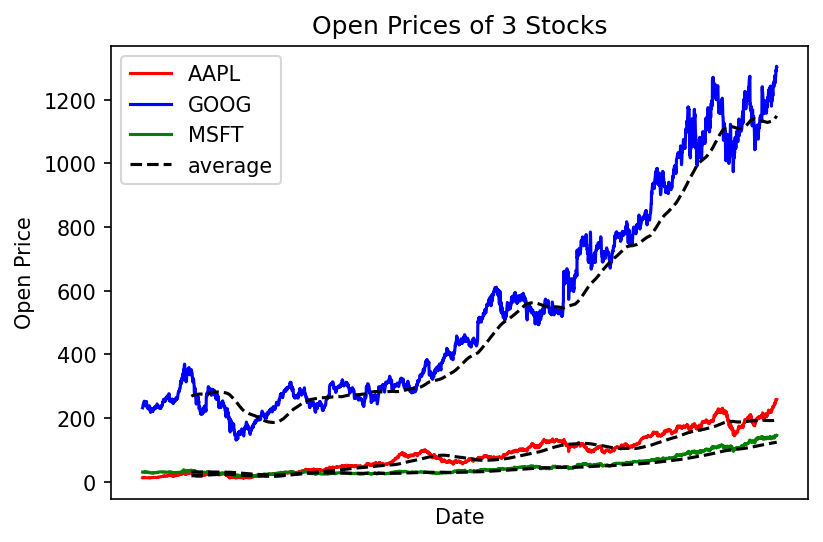

average line is  about moving average for each year
MSFT has stable average line. recommended for people who invest without risk. but small gain.
GOOG has unstable average line. recommended for people who invest for high gain with high risk.
AAPL has little unstable average line. recommended for people who invest for normal gain with little risk.
whatever, If you invest any stock for long time, it will increase.


In [2]:
# read a csv file into a dataframe
# got error when i try UTF-8 encoding
df1 = pd.read_csv('AAPL.csv', encoding="Windows-1252")
df2 = pd.read_csv('GOOG.csv', encoding="Windows-1252")
df3 = pd.read_csv('MSFT.csv', encoding="Windows-1252")

index = df1['Date'].to_numpy()

openA = pd.DataFrame(df1['Open'].to_numpy(),index, columns=['AAPL'])
openG = pd.DataFrame(df2['Open'].to_numpy(),index, columns=['GOOG'])
openM = pd.DataFrame(df3['Open'].to_numpy(),index, columns=['MSFT'])

plt.figure(dpi=150)
plt.plot(openA, color="red")
plt.plot(openG, color="blue")
plt.plot(openM, color="green")
plt.plot(index, openA.rolling(250).mean(), color="black", linestyle="--")
plt.plot(index, openG.rolling(250).mean(), color="black", linestyle="--")
plt.plot(index, openM.rolling(250).mean(), color="black", linestyle="--")
plt.title('Open Prices of 3 Stocks', color="black")
plt.legend(['AAPL', 'GOOG', 'MSFT', 'average'])
plt.xticks([])
plt.ylabel('Open Price', color="black")
plt.xlabel('Date', color="black")
plt.show()

print("average line is  about moving average for each year")
print("MSFT has stable average line. recommended for people who invest without risk. but small gain.")
print("GOOG has unstable average line. recommended for people who invest for high gain with high risk.")
print("AAPL has little unstable average line. recommended for people who invest for normal gain with little risk.")
print("whatever, If you invest any stock for long time, it will increase.")

### 2. Pick 2018 as a year and MSFT as a stock. (7 points)
#### Display one figure with low, high and calculated mean prices: 
    - ‘Low’ and ‘High’ prices using stack chart
    - their mean = (high + low)/2, using a line plot

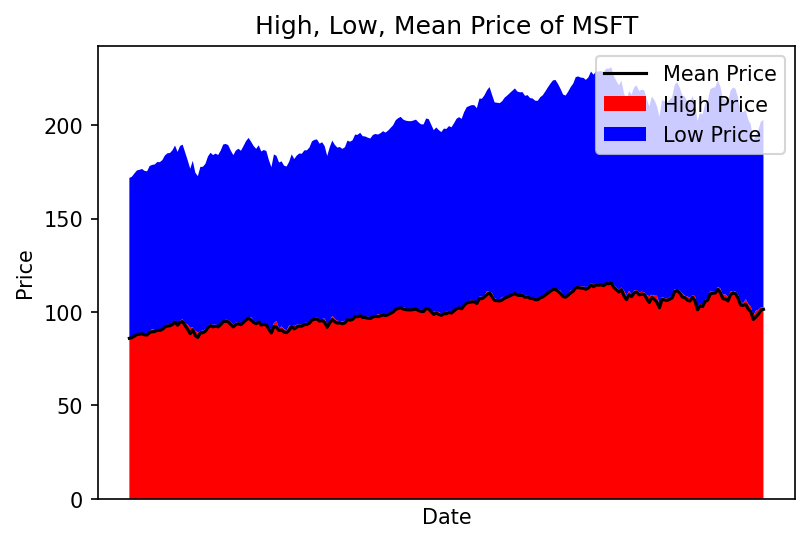

In [3]:
MSFT2018 = df3[df3['Date'].str.contains('2018', regex=False, case=False, na=False)]

index2018 = MSFT2018['Date'].to_numpy()

templow = MSFT2018['Low'].to_numpy()
temphigh = MSFT2018['High'].to_numpy()
tempmean = (temphigh + templow) / 2

MSFT2018M = pd.DataFrame(tempmean,index2018, columns=['Mean'])

plt.figure(dpi=150)
plt.stackplot(index2018, temphigh, templow, colors=['r','b'])
plt.plot(MSFT2018M, color="black")
plt.title('High, Low, Mean Price of MSFT', color="black")
plt.legend(['Mean Price', 'High Price', 'Low Price'])
plt.xticks([])
plt.ylabel('Price', color="black")
plt.xlabel('Date', color="black")
plt.show()

### 3. Plot rolling windows means of all 3 stocks (‘Open’ prices) in one figure: (7 points)
    - Use weekly, monthly and yearly windows 
    - Compare them (and describe your comparison with statements)
    - Which one to buy? When? Why? (answer to these questions will not be graded)

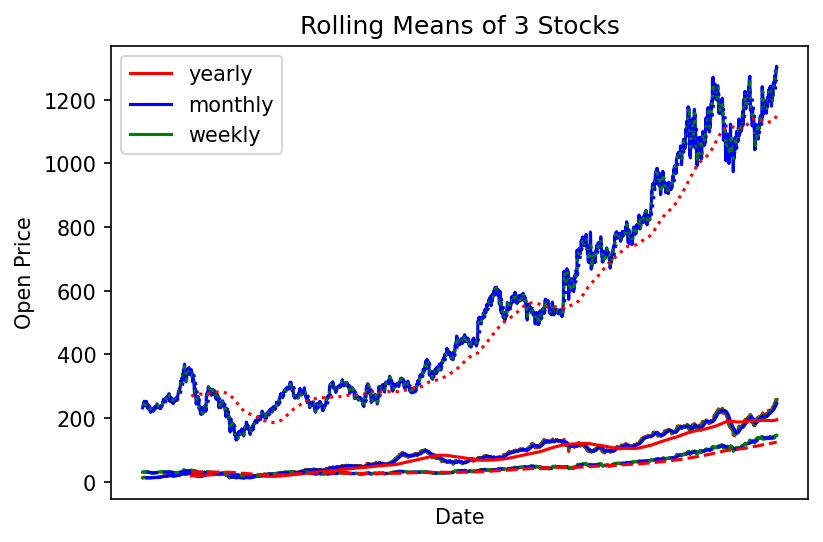

MSFT has stable average line for every means. recommended for people who invest without risk. but small gain.
GOOG has unstable average line. However, it will be stable if investment period become longer.
recommended for people who invest for high gain with high risk. or recommended for Long-Term Investor
AAPL has little unstable average line. recommended for people who invest for normal gain with little risk.


In [4]:
plt.figure(dpi=150)
plt.plot(openA, color="red")
plt.plot(openG, color="blue")
plt.plot(openM, color="green")

plt.plot(index, openA.rolling(5).mean(), color="green", linestyle='solid')
plt.plot(index, openA.rolling(21).mean(), color="blue", linestyle='solid')
plt.plot(index, openA.rolling(250).mean(), color="red", linestyle='solid')

plt.plot(index, openG.rolling(5).mean(), color="green", linestyle='dotted')
plt.plot(index, openG.rolling(21).mean(), color="blue", linestyle='dotted')
plt.plot(index, openG.rolling(250).mean(), color="red", linestyle='dotted')

plt.plot(index, openM.rolling(5).mean(), color="green", linestyle='dashed')
plt.plot(index, openM.rolling(21).mean(), color="blue", linestyle='dashed')
plt.plot(index, openM.rolling(250).mean(), color="red", linestyle='dashed')

plt.title('Rolling Means of 3 Stocks', color="black")
plt.legend(['yearly', 'monthly', 'weekly'])
plt.xticks([])
plt.ylabel('Open Price', color="black")
plt.xlabel('Date', color="black")
plt.show()


print("MSFT has stable average line for every means. recommended for people who invest without risk. but small gain.")
print("GOOG has unstable average line. However, it will be stable if investment period become longer.")
print("recommended for people who invest for high gain with high risk. or recommended for Long-Term Investor")
print("AAPL has little unstable average line. recommended for people who invest for normal gain with little risk.")